In [4]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
df = pd.read_csv('/Users/anoushka/Desktop/titanic.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
average_age = df['Age'].mean()
average_age

29.69911764705882

In [16]:
is_survivor = df['Survived']==1
is_survivor

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

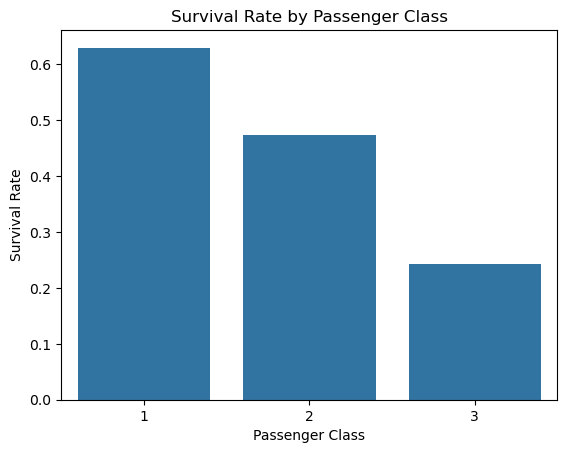

In [18]:
# Plot survival rate by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=survival_by_class)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

In [ ]:
'''
First-class passengers were significantly more likely to survive, with over 60% survival rate, 
whereas third-class passengers faced the greatest risk. 
This stark contrast highlights the impact of social class on survival during the tragedy.
'''

In [26]:
mean_age = df['Age'].mean()
age_difference = df['Age'] - mean_age
age_difference

0      -7.699118
1       8.300882
2      -3.699118
3       5.300882
4       5.300882
         ...    
886    -2.699118
887   -10.699118
888          NaN
889    -3.699118
890     2.300882
Name: Age, Length: 891, dtype: float64

In [28]:
fare_min = df['Fare'].min()
fare_max = df['Fare'].max()
normalized_fare = ((df["Fare"] - fare_min ) / ( fare_max - fare_min ))
normalized_fare 

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

In [36]:
family_size = df['SibSp']+df['Parch']+1
family_size

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Length: 891, dtype: int64

In [34]:
fare_per_family_member = df['Fare']/family_size

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='Age', hue='Pclass', multiple='stack', bins=20, palette='coolwarm')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
'''
This histogram depicts the age distribution across the different passenger classes, 
revealing the dynamics between age and class structure during this journey.
'''

In [ ]:
fare_weight = df['Fare']/df['Fare'].max()
weighted_age = fare_weight*df['Age']

In [ ]:
sorted_fares = df['Fare'].sort_values()
cumulative_fare_percentage = (sorted_fares.cumsum() / sorted_fares.sum()) * 100

In [ ]:
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)
IQR = Q3-Q1
is_fare_outlier = (df['Fare']<Q1 - 1.5 * IQR)|(df['Fare']>Q3 + 1.5 * IQR)

In [ ]:
sorted_df = df.sort_index()
rolling_average_fare = sorted_df['Fare'].rolling(window=10, min_periods=1).mean()

In [ ]:
import seaborn as sns
# Create a KDE plot for the age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', color='green')
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', color='red')

# Add labels and title
plt.title('Age Distribution for Survivors vs Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Survival Status')
plt.show()

In [ ]:
'''
The age distribution reveals that younger passengers had a slightly higher survival rate. 
Interestingly, a noticeable drop in survival is observed around mid-adulthood, 
showing a subtle shift in survival patterns across different age groups.
'''